# Module 2, Lecture 2: Processing and Analyzing Data in Python

### Reading and Manipulating CSV Files  

In this section, we define a helper function `read_in_data()` to load survey data stored in CSV format.  
- The **`csv` library** is used to open and read the file.  
- The **header row** (column names) is extracted separately.  
- Each row of student data is processed while removing the first column (student ID).  
- The results are converted into a **NumPy array of integers** for analysis, along with a **string array of labels** for the categories.  

This prepares the survey dataset for further analysis with NumPy and visualization tools.  


In [1]:
# sample code for reading and manipulating CSV files

import csv
import numpy as np
import matplotlib.pyplot as plt
import math

# function to create a data collection from a file

def read_in_data(file):
    # Open the CSV file in read mode ('r')
    with open(file, 'r', newline='') as csvfile:
        # Create a csv.reader object
        csvreader = csv.reader(csvfile)
    
        # Read the header row
        header = next(csvreader)
       # print("Header:", header)
        
        output = []
        # Iterate over the remaining rows
        for row in csvreader:
           # strip off first entry
            output.append(row[1:])
    # create an np array of the results; with ints as type of entries
    # and keeping the header (minus first element) as strings   
    return np.array(output, dtype= np.int32), np.array(header[1:], dtype = str)      
            
raw_data, labels = read_in_data('data_lec2/survey_data_prof1.csv')
raw_data

array([[5, 6, 5, 5],
       [7, 7, 7, 7],
       [2, 5, 3, 4],
       [6, 6, 6, 6],
       [6, 7, 6, 7],
       [3, 5, 5, 4],
       [7, 7, 6, 7],
       [5, 5, 4, 5],
       [7, 7, 6, 6]], dtype=int32)

### Visualizing Survey Results with Bar Charts  

We define a function `plot_survey_for_prof()` to quickly visualize professor survey data:  
- Data is read in using our `read_in_data()` function.  
- **NumPy’s `.mean(axis=0)`** computes the average rating across all students for each category.  
- A **bar chart** is created with Matplotlib, using the labels on the x-axis and mean values on the y-axis.  

By calling the function on different files, we can easily compare survey results for multiple professors.  


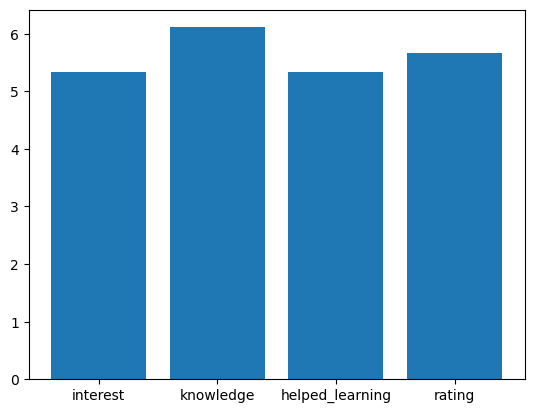

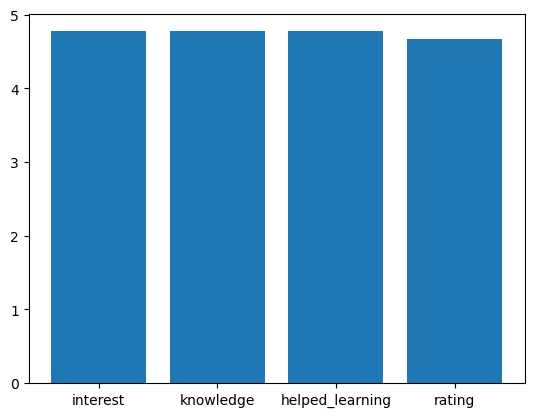

In [2]:
# simple plotting function for data set
def plot_survey_for_prof (file):
    raw_data, labels = read_in_data(file)
    results = raw_data.mean(axis = 0)
    plt.bar(labels, results)
    plt.show()

plot_survey_for_prof('data_lec2/survey_data_prof1.csv')
plot_survey_for_prof('data_lec2/survey_data_prof2.csv')


### Adjusting the Y-Axis Scale  

To make comparisons clearer, we update the plotting function `plot_survey_for_prof_rev1()` by setting the **y-axis range** explicitly with `plt.ylim(0, 8)`.  
- This ensures the full 1–7 rating scale is always shown, even if the data does not use the extremes.  
- The rest of the plotting steps remain the same as before (computing column means and displaying a bar chart).  

This adjustment provides a more realistic view of professor ratings across categories.  


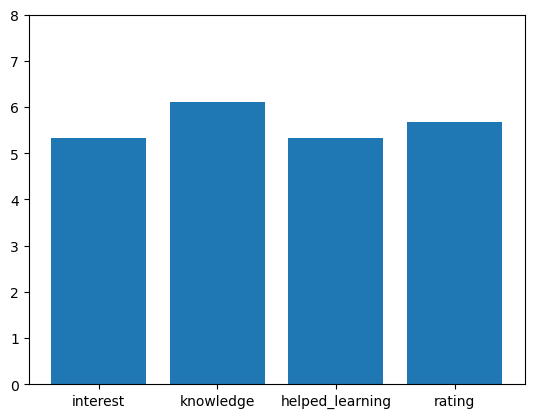

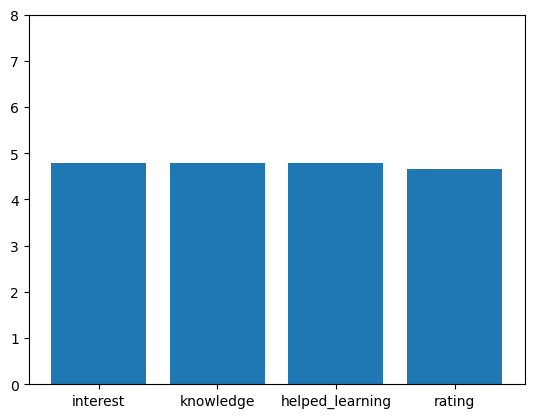

In [3]:
# change range of y axis to make scale more apparent

def plot_survey_for_prof_rev1 (file):
    raw_data, labels = read_in_data(file)
    results = raw_data.mean(axis = 0)
    plt.ylim(0, 8)
    plt.bar(labels, results)
    plt.show()

plot_survey_for_prof_rev1('data_lec2/survey_data_prof1.csv')
    
plot_survey_for_prof_rev1('data_lec2/survey_data_prof2.csv')

### Comparing Multiple Professors  

The function `plot_average_for_several_profs()` extends our plotting approach to handle **several CSV files at once**:  
- It reads in each professor’s survey data and computes the column means.  
- Bars for each professor are plotted **side by side** using an offset (`bar_width`) to avoid overlap.  
- Axis labels, tick marks, and a legend identify the categories and professors.  
- The y-axis is fixed from 0–8 to match the rating scale.  

This visualization makes it easy to compare average ratings across professors on the same categories.  


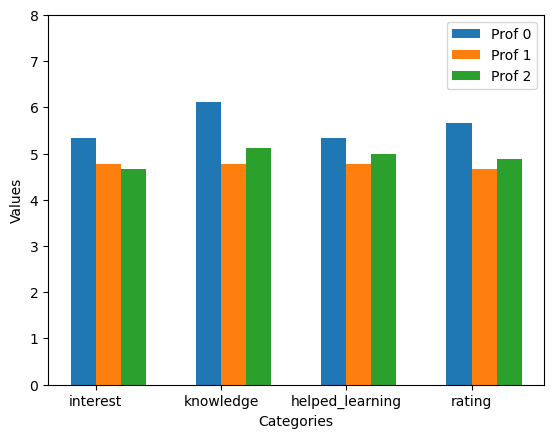

In [4]:
def plot_average_for_several_profs(file_list):
    profs = len(file_list) 
    results_all = []
    for file in file_list:
        raw_data, labels = read_in_data(file)
        results = raw_data.mean(axis = 0)
        results_all.append(results)
    index = np.arange(len(labels))
    bar_width = 0.2
    for i in range(profs):
        plt.bar(index + i * bar_width, results_all[i], bar_width, label = 'Prof ' + str(i))
    plt.ylim(0,8)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()
    plt.show()

plot_average_for_several_profs(('data_lec2/survey_data_prof1.csv', 'data_lec2/survey_data_prof2.csv',
                                'data_lec2/survey_data_prof3.csv'))

### Computing Median Values  

So far, we’ve summarized survey results using the **mean**. Here, we define a helper function `median_values()` to compute the **median score** for each category:  
- For each column of data, extract all ratings and sort them.  
- If the number of entries is odd, select the middle value.  
- If it’s even, take the average of the two middle values.  

The function returns a list of medians across all categories, giving an alternative measure of central tendency that is less affected by outliers than the mean.  


In [5]:
# want to get the median score, instead of the average score

def median_values(data):
    number_entries = data.shape[0]
    number_columns = data.shape[1]
    medians = []
    for col in range(number_columns):
        # get the values for a specific column
        col_values = data[:, col]
        col_values.sort()
        if number_entries%2 == 1:
            # odd number of entries
            medians.append((col_values[math.floor(number_entries/2)]))
        else:
            # even number of entries, find average of middle two 
            low = col_values[math.floor(number_entries/2) -1]
            high = col_values[math.floor(number_entries/2)]
            medians.append(((low + high)/2))
    return medians

### Visualizing Median Ratings Across Professors  

The function `plot_medians_for_several_profs()` compares multiple professors using **medians instead of means**:  
- For each CSV file, the survey data is read and median scores are computed with `median_values()`.  
- Results are displayed as side-by-side bar charts for each category.  
- Labels, axis ranges, and legends are included to make comparisons clear.  

Using medians provides a more robust summary than means, since extreme outlier ratings have less influence on the results.  


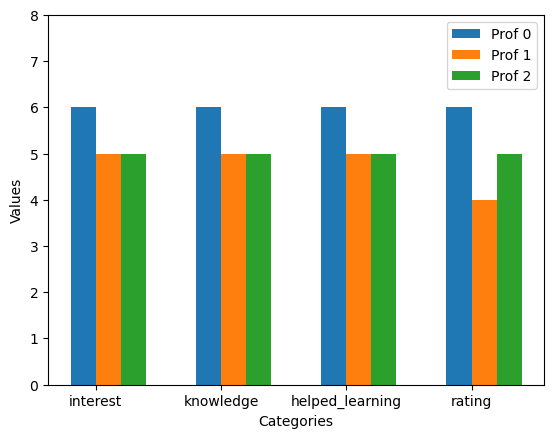

In [10]:
def plot_medians_for_several_profs(file_list):
    profs = len(file_list) 
    results_all = []
    for file in file_list:
        raw_data, labels = read_in_data(file)
        results = median_values(raw_data)
        results_all.append(results)
    index = np.arange(len(labels))
    bar_width = 0.2
    for i in range(profs):
        plt.bar(index + i * bar_width, results_all[i], bar_width, label = 'Prof ' + str(i))
    plt.ylim(0,8)
    plt.xlabel('Categories')
    plt.ylabel('Values')
    plt.xticks(index + bar_width / 2, labels)
    plt.legend()
    plt.show()

        
plot_medians_for_several_profs(('data_lec2/survey_data_prof1.csv', 
                                'data_lec2/survey_data_prof2.csv',
                                'data_lec2/survey_data_prof3.csv'))   

### Saving Analysis Results with Dictionaries  

To organize results for multiple professors, we extend our workflow with two functions:  

- **`analyze_data(name, file_name)`**  
  - Reads in a professor’s survey data.  
  - Computes summary statistics (min, max, mean, median).  
  - Rounds values to a fixed number of significant digits.  
  - Stores results in a dictionary with categories as keys.  

- **`create_faculty_data(name_list, file_list)`**  
  - Iterates over names and corresponding files.  
  - Calls `analyze_data()` for each professor.  
  - Builds a nested dictionary mapping each professor to their results.  

The final structure, `results`, provides an easy way to query statistics for any professor and category without recomputing values.  


In [9]:
# utility function to only save significant digits

sig_digits = 2

def significant(num, digits):
    return round(num * 10**digits) * 10**(- digits)

# saving analysis as a dict in a file

def analyze_data(name, file_name):
    raw_data, labels = read_in_data(file_name)
    # get means
    means = raw_data.mean(axis = 0)
    # get medians
    medians = median_values(raw_data)
    # get mins and maxs
    mins = raw_data.min(axis = 0)
    maxs = raw_data.max(axis = 0)
    
    results = {}
    value_labels = ['min', 'max', 'mean', 'median']
    data_sources = [mins, maxs, means, medians]
    for i in range(len(labels)):
        entry = {}
        for j in range(len(value_labels)):
            entry[value_labels[j]] = significant(data_sources[j][i], sig_digits)
        results[labels[i]] = entry
    return name, results

def create_faculty_data(name_list, file_list):
    data_structure = {}
    for name in name_list:
        ind = name_list.index(name)
        file = file_list[ind]
        store_name, entry = analyze_data(name, file)
        data_structure[store_name] = entry
    return data_structure

results = create_faculty_data(['Prof 1', 'Prof 2', 'Prof 3', 'Prof 4', 'Prof 5'],
                              ['data_lec2/survey_data_prof1.csv',
                                'data_lec2/survey_data_prof2.csv',
                                'data_lec2/survey_data_prof3.csv',
                                'data_lec2/survey_data_prof4.csv',
                                'data_lec2/survey_data_prof5.csv'
                                ])
results

{'Prof 1': {np.str_('interest'): {'min': 2.0,
   'max': 7.0,
   'mean': 5.33,
   'median': 6.0},
  np.str_('knowledge'): {'min': 5.0, 'max': 7.0, 'mean': 6.11, 'median': 6.0},
  np.str_('helped_learning'): {'min': 3.0,
   'max': 7.0,
   'mean': 5.33,
   'median': 6.0},
  np.str_('rating'): {'min': 4.0, 'max': 7.0, 'mean': 5.67, 'median': 6.0}},
 'Prof 2': {np.str_('interest'): {'min': 2.0,
   'max': 7.0,
   'mean': 4.78,
   'median': 5.0},
  np.str_('knowledge'): {'min': 3.0, 'max': 7.0, 'mean': 4.78, 'median': 5.0},
  np.str_('helped_learning'): {'min': 3.0,
   'max': 6.0,
   'mean': 4.78,
   'median': 5.0},
  np.str_('rating'): {'min': 3.0, 'max': 7.0, 'mean': 4.67, 'median': 4.0}},
 'Prof 3': {np.str_('interest'): {'min': 3.0,
   'max': 7.0,
   'mean': 4.67,
   'median': 5.0},
  np.str_('knowledge'): {'min': 4.0, 'max': 6.0, 'mean': 5.11, 'median': 5.0},
  np.str_('helped_learning'): {'min': 3.0,
   'max': 7.0,
   'mean': 5.0,
   'median': 5.0},
  np.str_('rating'): {'min': 3.0, 'ma

### Generating Random Survey Data  

To test our analysis on larger or synthetic datasets, we use Python’s `random` library:  

- **`create_random_survey(number_entries, file_name)`**  
  - Creates a CSV file with a header and the given number of rows.  
  - Each row includes a unique ID and four random ratings between 1 and 7.  

- **`create_large_scale_test(number_faculty, number_entries)`**  
  - Generates survey files for multiple professors.  
  - Each file contains `number_entries` of random ratings.  
  - Calls `plot_medians_for_several_profs()` to visualize results side by side.  

This allows us to stress-test the pipeline with thousands of simulated survey responses, confirming that our code scales to larger datasets.  


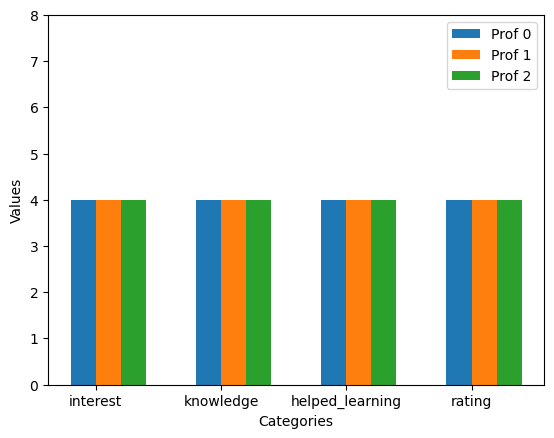

In [11]:
import random

# create a random data set
def create_random_survey(number_entries, file_name):
    with open(file_name, 'w', newline='') as csvfile:
        # Create a csv.reader object
        csvwriter = csv.writer(csvfile)

        # Write the header row
        csvwriter.writerow(['ID','interest','knowledge','helped_learning','rating'])
        
        for i in range(number_entries):
            csvwriter.writerow([i,random.randint(1,7),random.randint(1,7),
                               random.randint(1,7), random.randint(1,7)])
            
create_random_survey(100, 'data_lec2/surve_data_prof5.csv')
                     
def create_large_scale_test(number_faculty, number_entries):
    file_list = [] 
    for i in range(6, 6 + number_faculty):
        file_name = 'data_lec2/survey_data_prof' + str(i) + '.csv'
        create_random_survey(number_entries, file_name)
        file_list.append(file_name)
    plot_medians_for_several_profs(file_list)
    
create_large_scale_test(3, 1000)

### Generating Random Data with Custom Distributions  

Instead of sampling uniformly, we can shape the distribution of ratings by repeating certain values more often in a list and then sampling with `random.choices()`:  

- **`dist_centered`**: More 4’s than other values, creating a distribution centered around the middle of the 1–7 scale.  
- **`dist_high`**: More 6’s and 7’s, producing a distribution skewed toward higher ratings.  
- **`random.choices(..., k=20)`** samples 20 ratings from these lists, reflecting the relative frequencies.  

This approach lets us simulate professors with different rating profiles (average vs. strong performance) and observe how analysis results vary across distributions.  


In [12]:
# creating a random data set with specified distribution

dist_centered = [1, 2, 2, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 6, 6, 7]
trial_centered = random.choices(dist_centered,k = 20)

dist_high = [1, 2, 3, 4, 4, 5, 5, 5, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7]
trial_high = random.choices(dist_high, k = 20)

create_random_survey(100, 'data_lec2/surve_data_prof5.csv')

### Creating Random Data with Controlled Distributions  

We extend random survey generation to allow **custom distributions** for professor ratings:  

- **`create_random_survey_dist(number_entries, file_name, dist)`**  
  - Writes a CSV file with the given number of entries.  
  - Each rating is sampled with `random.choice(dist)`, so the distribution of scores reflects the input list.  

- **`create_large_scale_test_with_dist(number_faculty, number_entries, distributions)`**  
  - Generates multiple professor survey files, each using a different rating distribution.  
  - Plots the medians across all generated datasets for comparison.  

This approach simulates professors with distinct evaluation patterns (e.g., average-centered vs. high-scoring) and shows how distributional differences influence the analysis results.  


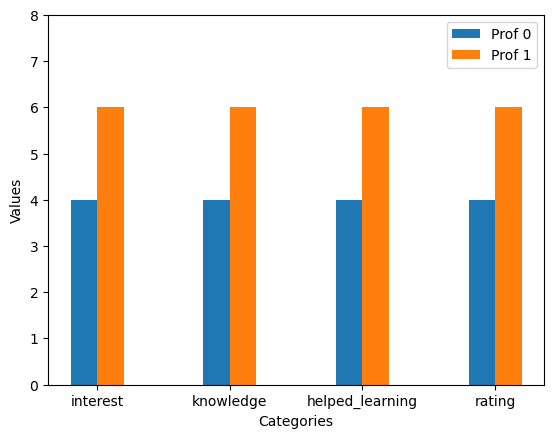

In [13]:
# create a random data set
def create_random_survey_dist(number_entries, file_name, dist ):
    with open(file_name, 'w', newline='') as csvfile:
        # Create a csv.reader object
        csvwriter = csv.writer(csvfile)

        # Write the header row
        csvwriter.writerow(['ID','interest','knowledge','helped_learning','rating'])
        
        for i in range(number_entries):
            csvwriter.writerow([i,
                                random.choice(dist),
                                random.choice(dist),
                                random.choice(dist),
                                random.choice(dist)])

            
def create_large_scale_test_with_dist(number_faculty, number_entries, distributions):
    file_list = [] 
    for i in range(10, 10 + number_faculty):
        file_name = 'data_lec2/survey_data_prof' + str(i) + '.csv'
        dist = distributions[i-10]
        create_random_survey_dist(number_entries, file_name, dist)
        file_list.append(file_name)
    plot_medians_for_several_profs(file_list)
    
create_large_scale_test_with_dist(2, 1000, [dist_centered, dist_high])


### Converting CSV Data into a Pandas DataFrame  

While NumPy arrays are efficient for numerical computation, **Pandas DataFrames** provide a more flexible, labeled structure that resembles a spreadsheet.  

- The function `convert_data_to_Pandas()` reads in survey data, strips off the ID column, and converts the results into a NumPy array.  
- A Pandas DataFrame is then created with **column labels** taken from the CSV header.  
- Displaying the DataFrame shows the data in a neatly formatted, table-like view with indices and column names.  

This makes it easier to explore, slice, and analyze survey results with built-in Pandas tools.  


In [14]:
# using pandas

import pandas as pd


def convert_data_to_Pandas(file):
    with open(file, 'r', newline='') as csvfile:
        # Create a csv.reader object
        csvreader = csv.reader(csvfile)
    
        # Read the header row
        header = next(csvreader)
       # print("Header:", header)
        
        output = []
        # Iterate over the remaining rows
        for row in csvreader:
           # strip off first entry
            output.append(row[1:])
    # create an np array of the results; with ints as type of entries
    # and keeping the header (minus first element) as strings   
    nparr = np.array(output, dtype = np.int32)
    return pd.DataFrame(nparr, columns = header[1:])

test = convert_data_to_Pandas('data_lec2/survey_data_prof1.csv')
print(test)

   interest  knowledge  helped_learning  rating
0         5          6                5       5
1         7          7                7       7
2         2          5                3       4
3         6          6                6       6
4         6          7                6       7
5         3          5                5       4
6         7          7                6       7
7         5          5                4       5
8         7          7                6       6


### Reading CSVs Directly with Pandas  

Pandas makes it simple to load data directly from a CSV file using `pd.read_csv()`:  

- **`pd.read_csv('data_lec2/survey_data_prof1.csv')`**  
  Loads the entire file, including the ID column.  

- **`pd.read_csv(..., usecols=[1,2,3,4])`**  
  Loads only the specified columns, skipping the ID field.  

Once loaded into a DataFrame, the method **`.describe()`** automatically computes summary statistics such as:  
- Mean, standard deviation  
- Minimum and maximum values  
- 25th, 50th (median), and 75th percentiles  

This gives a quick overview of the distribution of ratings in each category without writing custom code.  


In [15]:
test = pd.read_csv('data_lec2/survey_data_prof1.csv')

new_test = pd.read_csv('data_lec2/survey_data_prof1.csv', usecols = [1,2,3,4])

print(new_test)
print(new_test.describe())


print(test)
print(test.describe())

   interest  knowledge  helped_learning  rating
0         5          6                5       5
1         7          7                7       7
2         2          5                3       4
3         6          6                6       6
4         6          7                6       7
5         3          5                5       4
6         7          7                6       7
7         5          5                4       5
8         7          7                6       6
       interest  knowledge  helped_learning    rating
count  9.000000   9.000000         9.000000  9.000000
mean   5.333333   6.111111         5.333333  5.666667
std    1.802776   0.927961         1.224745  1.224745
min    2.000000   5.000000         3.000000  4.000000
25%    5.000000   5.000000         5.000000  5.000000
50%    6.000000   6.000000         6.000000  6.000000
75%    7.000000   7.000000         6.000000  7.000000
max    7.000000   7.000000         7.000000  7.000000
   ID  interest  knowledge  helped

### Computing Medians with Pandas  

While `.describe()` reports the 50th percentile (median), we can also implement our own functions to practice column-level operations:  

- **`median(df, column_label)`**  
  - Extracts a single column as a Pandas Series.  
  - Sorts the values and computes the median manually.  
  - Handles both odd and even numbers of entries.  

- **`median_all(column_data)`**  
  - Designed to be applied to every column using `DataFrame.apply()`.  
  - Returns the median for each column in the DataFrame.  

This shows how Pandas supports both **column-specific computations** and **vectorized operations across all columns**, giving flexibility in how we summarize data.  


In [ ]:
def median(df, column_label):
    # get column 
    column_data = df.loc[:, column_label]
    # this returns a Series
    column_data.sort_values()
    number_entries = column_data.size
    if number_entries%2 == 1:
        # odd number of entries
        return column_data[math.floor(number_entries/2)]
    else:
        # even number of entries, find average of middle two 
        low = column_data[math.floor(number_entries/2) -1]
        high = column_data[math.floor(number_entries/2)]
        return (low + high)/2
    
def median_all(column_data):
    # apply to each column
    column_data.sort_values()
    number_entries = column_data.size
    if number_entries%2 == 1:
        # odd number of entries
        return column_data[math.floor(number_entries/2)]
    else:
        # even number of entries, find average of middle two 
        low = column_data[math.floor(number_entries/2) -1]
        high = column_data[math.floor(number_entries/2)]
        return (low + high)/2

print( test)       
print(median(test, 'interest'))

print(test.apply(median_all, axis=0))

6
ID                 5
interest           6
knowledge          7
helped_learning    6
rating             7
dtype: int64
